In [1]:
import pandas as pd
import numpy as np

# 한글 깨짐 방지
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'malgun Gothic'

# 경고창 무시 
import warnings
warnings.filterwarnings("ignore")

## 수정판 각 Feature별 설명

1. 총자본증가율 = (기말자산 - 기초자산) / abs(기초자산) : 자산의 증가율 - 클수록 좋음
2. 총자본순이익률(ROA) = 당기순이익 / 자산 : 자산대비 순이익 - 클수록 자산이 창출하는 순이익이 많다.
3. 매출원가율 : 매출원가 / 매출액 : 매출에서 매출원가가 차지하는 비율 - 매출원가율이 낮을수록 매출총이익율이 커지므로(Trade-Off관계) 매출원가율은 낮을수록 좋다.
4. 영업비용대 영업수익비율 = 영업비용 / 영업수익 : 수익이 많을수록 좋으므로 낮을수록 좋다
5. 금융비용대 총비용비율 = 순금융비용 / 총비용 : 총 비용에서 금융비용이 미치는 영향
6. 순운전자본비율 : 순운전자본 / 자산 : 순운전자본이 자산에서 차지하는 비율 - 자산에서 유동성 높은 자산-부채가 얼마냐 많은가
7. 순운전자본회전률 = 매출액 / 순운전자본평균 : 순운전자본이 매출애 기여하는 정도. 클수록 좋다.
8. CASHFLOW 대 총자본비율 =  영업현금흐름평균 / 자산 : 자산 대비 영업현금흐름의 차이 - 클수록 자산대비 창출해내는 현금흐름이 크다는 뜻

9. 주당정상영업이익 = 영업이익 / 평균발행주식수 : 주당 영업이익 : 클수록 좋음
10. 자기자본구성비율 = 자본 / 자산 : 총자산에서 자본이 차지하는 비율 - 총자본에서 자기자본이 차지하는 비율

11. 재고자산대유동자산비율 = 재고자산 / 유동자산
12. 비유동비율 = (비유동자산-이연자산) / (자본+비유동부채)



* 총자본 : 자산
* 순운전자본 : 유동자산-유동부채
* 순금융비용 : 이자비용 - 이자수익 - 배당금수익
* 총비용 : 이자비용 + 판매비와관리비 + 영업외비용
* 영업현금흐름평균 : (기초영업현금흐름+기말영업현금흐름)/2
* 부채평균 : (기초부채 + 기말부채)/2
* 순운전자본평균 : (기초순운전자본+기말순운전자본)/2

# 3년연속 흑자기업 제거 완료 후 데이터 로드

In [2]:
# 데이터로드
df = pd.read_csv('./datasets/투자/KOSDAQ_DATA(투자).csv', index_col=0)
df

,회사명,거래소코드,회계년도,총자본증가율,총자본순이익률,자기자본순이익률,매출원가대매출액비율,금융비용대총비용비율,자기자본구성비율,순운전자본비율,CASHFLOW대총자본비율,순운전자본회전률,1주당순이익,1주당정상영업이익,시가총액
0,(주)더블유게임즈,192080,2015/12,653.425251,8.93,9.28,0.00,-1.81,96.26,94.21,10.13,0.32,2527.0,2355.44,866451237600
1,(주)더블유게임즈,192080,2016/12,14.233989,11.15,12.91,0.00,-4.64,86.56,60.73,12.42,0.41,2952.0,2610.46,684804556600
2,(주)더블유게임즈,192080,2017/12,128.208009,4.97,9.04,0.00,6.07,40.58,-20.29,6.85,0.81,2204.0,4648.98,909688073800
3,(주)엘엑스세미콘,108320,2011/12,10.913990,12.88,15.45,77.46,-2.27,82.29,73.63,14.32,1.10,2046.0,1536.72,507446160000
4,(주)엘엑스세미콘,108320,2012/12,25.259973,13.61,17.26,83.41,-1.35,76.08,65.96,6.27,1.41,2628.0,2677.94,363507105000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,흥구석유(주),24060,2012/12,-1.142093,1.91,2.26,96.91,0.05,86.00,8.60,4.12,10.79,99.0,49.27,23775000000
6570,흥구석유(주),24060,2016/12,1.387501,2.77,3.17,94.67,0.02,87.41,14.15,3.55,8.24,150.0,64.25,51375000000
6571,흥구석유(주),24060,2017/12,0.979314,2.60,2.97,94.93,0.07,87.29,8.68,1.67,7.20,142.0,50.10,41625000000
6572,흥구석유(주),24060,2018/12,-5.888978,3.06,3.38,95.00,-0.01,93.67,11.59,4.39,8.08,163.0,72.83,40575000000


In [3]:
# 상장일 데이터 로드 후 회사명기준으로 중복 데이터 삭제
df1 = pd.read_csv('./datasets/상장일.csv', encoding='cp949')
df1 = df1[['거래소코드', '상장일']]
df1.drop_duplicates('거래소코드', inplace=True)

In [4]:
df[df['거래소코드'] == 234920]

,회사명,거래소코드,회계년도,총자본증가율,총자본순이익률,자기자본순이익률,매출원가대매출액비율,금융비용대총비용비율,자기자본구성비율,순운전자본비율,CASHFLOW대총자본비율,순운전자본회전률,1주당순이익,1주당정상영업이익,시가총액
6062,자이글(주),234920,2016/12,50.739243,15.04,16.75,26.06,-0.46,94.05,34.99,17.67,2.57,903.0,1093.61,122454735500
6063,자이글(주),234920,2017/12,2.971385,5.79,6.06,28.13,-0.40,95.63,24.94,8.46,2.76,384.0,439.81,94310442700


In [5]:
df2 = pd.merge(df, df1, how='left', on='거래소코드')
df2

,회사명,거래소코드,회계년도,총자본증가율,총자본순이익률,자기자본순이익률,매출원가대매출액비율,금융비용대총비용비율,자기자본구성비율,순운전자본비율,CASHFLOW대총자본비율,순운전자본회전률,1주당순이익,1주당정상영업이익,시가총액,상장일
0,(주)더블유게임즈,192080,2015/12,653.425251,8.93,9.28,0.00,-1.81,96.26,94.21,10.13,0.32,2527.0,2355.44,866451237600,2015/11/04
1,(주)더블유게임즈,192080,2016/12,14.233989,11.15,12.91,0.00,-4.64,86.56,60.73,12.42,0.41,2952.0,2610.46,684804556600,2015/11/04
2,(주)더블유게임즈,192080,2017/12,128.208009,4.97,9.04,0.00,6.07,40.58,-20.29,6.85,0.81,2204.0,4648.98,909688073800,2015/11/04
3,(주)엘엑스세미콘,108320,2011/12,10.913990,12.88,15.45,77.46,-2.27,82.29,73.63,14.32,1.10,2046.0,1536.72,507446160000,2010/06/08
4,(주)엘엑스세미콘,108320,2012/12,25.259973,13.61,17.26,83.41,-1.35,76.08,65.96,6.27,1.41,2628.0,2677.94,363507105000,2010/06/08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,흥구석유(주),24060,2012/12,-1.142093,1.91,2.26,96.91,0.05,86.00,8.60,4.12,10.79,99.0,49.27,23775000000,1994/12/07
6570,흥구석유(주),24060,2016/12,1.387501,2.77,3.17,94.67,0.02,87.41,14.15,3.55,8.24,150.0,64.25,51375000000,1994/12/07
6571,흥구석유(주),24060,2017/12,0.979314,2.60,2.97,94.93,0.07,87.29,8.68,1.67,7.20,142.0,50.10,41625000000,1994/12/07
6572,흥구석유(주),24060,2018/12,-5.888978,3.06,3.38,95.00,-0.01,93.67,11.59,4.39,8.08,163.0,72.83,40575000000,1994/12/07


In [6]:
df2['회계년도추출'] = pd.to_datetime(df2['회계년도'], format=('%Y/%m')).dt.strftime('%Y')
df2['상장일추출'] = pd.to_datetime(df2['상장일'], format=('%Y/%m/%d')).dt.strftime('%Y')

In [7]:
df = df2[df2['회계년도추출'] > df2['상장일추출']].reset_index(drop=True)

# 시가총액으로 1번 더 필터링하기

In [8]:
# 2016년 기준 -> 년도!!!!!!!!!수정!!!!!!!!!!!!!!!!!!!!!!!해야함!!!!!!!!!!!!!!!!!!
흑자기업_df = df[df['회계년도'] == '2015/12']

# 시가총액을 기준으로 오름차순으로 정렬
df_sorted = 흑자기업_df.sort_values('시가총액') 
 # 하위 20% 데이터의 개수
cutoff_index = int(len(df_sorted) * 0.2)
# 하위 20%의 최소값
cutoff_value = df_sorted.iloc[cutoff_index]['시가총액'] 
# 시가총액이 하위 20% 이상인 데이터만 선택
cutoff_data = df_sorted[df_sorted['시가총액'] >= cutoff_value] 
# 인덱스초기화
cutoff_data.reset_index(drop=True, inplace=True)
# 불필요컬럼삭제
cutoff_data.drop(columns=['시가총액'], axis=1, inplace=True)

# 1. 총자본증가율 순위

In [9]:
# 총자본 증가율을 기준으로 오름차순 정렬
df_sorted = cutoff_data.sort_values(by="총자본증가율", ascending=False)

# 구간 수
n_groups = 10

# 각 구간의 범위 계산
group_range = len(cutoff_data) // n_groups
ranges = [(i*group_range, (i+1)*group_range) for i in range(n_groups)]
ranges[-1] = (ranges[-1][0], len(cutoff_data))

# 각 구간에 할당할 번호 계산
groups = [i+1 for i in range(n_groups) for _ in range(ranges[i][0], ranges[i][1])]

# 결과 출력
df_sorted["총자본증가율구간"] = groups
df_sorted

,회사명,거래소코드,회계년도,총자본증가율,총자본순이익률,자기자본순이익률,매출원가대매출액비율,금융비용대총비용비율,자기자본구성비율,순운전자본비율,CASHFLOW대총자본비율,순운전자본회전률,1주당순이익,1주당정상영업이익,상장일,회계년도추출,상장일추출,총자본증가율구간
395,아미코젠(주),92040,2015/12,194.009234,2.37,3.13,63.25,0.80,68.97,21.84,5.25,0.40,236.0,266.69,2013/09/12,2015,2013,1
247,엠케이전자(주),33160,2015/12,138.005274,21.42,94.36,86.76,1.76,52.26,36.92,1.03,0.58,7059.0,1135.92,1997/11/10,2015,1997,1
424,(주)컴투스,78340,2015/12,133.149238,30.25,34.97,10.23,-1.90,87.44,75.45,18.98,1.11,10721.0,13963.19,2007/07/06,2015,2007,1
391,(주)휴메딕스,200670,2015/12,95.892842,13.28,14.22,48.49,-3.65,94.74,66.11,8.01,0.59,1409.0,1694.54,2014/12/26,2015,2014,1
412,(주)에스에프에이,56190,2015/12,93.968645,3.42,6.33,79.54,-1.22,52.78,21.95,1.67,0.76,1767.0,3230.93,2001/12/18,2015,2001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,메가스터디(주),72870,2015/12,-38.329183,25.95,34.59,57.67,-1.30,81.19,38.02,13.94,0.84,24986.0,6214.92,2004/12/21,2015,2004,10
250,예스이십사(주),53280,2015/12,-39.658362,1.08,2.31,74.01,-0.22,45.57,9.70,14.45,1.92,104.0,743.86,2008/05/07,2015,2008,10
21,(주)광림,14200,2015/12,-40.241990,6.92,12.54,75.14,0.98,55.28,2.21,-2.13,2.28,506.0,69.39,1993/07/07,2015,1993,10
314,(주)슈프리마에이치큐,94840,2015/12,-43.353664,10.70,11.58,63.41,-1.94,92.83,57.10,26.57,0.31,909.0,23.73,2008/07/11,2015,2008,10


# 2. 총자본순이익률 순위

In [10]:
# CASHFLOW대총자본비율을 기준으로 오름차순 정렬
df_sorted = df_sorted.sort_values(by="총자본순이익률", ascending=False)

# 구간 수
n_groups = 10

# 각 구간의 범위 계산
group_range = len(df_sorted) // n_groups
ranges = [(i*group_range, (i+1)*group_range) for i in range(n_groups)]
ranges[-1] = (ranges[-1][0], len(df_sorted))

# 각 구간에 할당할 번호 계산
groups = [i+1 for i in range(n_groups) for _ in range(ranges[i][0], ranges[i][1])]

# 결과 출력
df_sorted["총자본순이익률구간"] = groups
df_sorted

,회사명,거래소코드,회계년도,총자본증가율,총자본순이익률,자기자본순이익률,매출원가대매출액비율,금융비용대총비용비율,자기자본구성비율,순운전자본비율,CASHFLOW대총자본비율,순운전자본회전률,1주당순이익,1주당정상영업이익,상장일,회계년도추출,상장일추출,총자본증가율구간,총자본순이익률구간
248,(주)부방,14470,2015/12,-3.375527,115.77,146.67,72.00,-0.44,85.83,8.13,6.67,1.34,9083.0,95.94,1994/02/25,2015,1994,9,1
424,(주)컴투스,78340,2015/12,133.149238,30.25,34.97,10.23,-1.90,87.44,75.45,18.98,1.11,10721.0,13963.19,2007/07/06,2015,2007,1,1
411,(주)웹젠,69080,2015/12,73.163202,27.50,35.66,0.00,-0.91,72.34,37.50,20.00,1.59,1911.0,2116.05,2003/05/23,2015,2003,1,1
388,(주)쎌바이오텍,49960,2015/12,30.143740,26.41,28.91,23.08,-1.57,91.72,64.01,18.77,0.95,2268.0,1995.62,2002/12/13,2015,2002,1,1
257,메가스터디(주),72870,2015/12,-38.329183,25.95,34.59,57.67,-1.30,81.19,38.02,13.94,0.84,24986.0,6214.92,2004/12/21,2015,2004,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,덕산하이메탈(주),77360,2015/12,9.489622,-8.20,-7.70,67.49,-0.26,83.59,14.67,6.77,0.65,-676.0,185.18,2005/10/14,2015,2005,5,10
183,(주)휴맥스홀딩스,28080,2015/12,-7.832373,-10.24,-10.93,0.00,0.00,90.69,-2.56,0.20,0.75,-2056.0,614.02,1997/04/16,2015,1997,10,10
95,(주)드래곤플라이,30350,2015/12,-18.415888,-11.17,-27.64,0.00,-0.56,36.52,-43.52,2.39,0.39,-535.0,262.97,1997/11/10,2015,1997,10,10
302,원풍물산(주),8290,2015/12,-18.283699,-22.25,-43.86,34.37,1.45,60.28,16.70,-1.43,0.98,-324.0,54.26,1997/07/18,2015,1997,10,10


# 3. 자기자본순이익률 순위

In [11]:
# 총자본순이익률을 기준으로 오름차순 정렬
df_sorted = df_sorted.sort_values(by="자기자본순이익률", ascending=False)

# 구간 수
n_groups = 10

# 각 구간의 범위 계산
group_range = len(df_sorted) // n_groups
ranges = [(i*group_range, (i+1)*group_range) for i in range(n_groups)]
ranges[-1] = (ranges[-1][0], len(df_sorted))

# 각 구간에 할당할 번호 계산
groups = [i+1 for i in range(n_groups) for _ in range(ranges[i][0], ranges[i][1])]

# 결과 출력
df_sorted["자기자본순이익률구간"] = groups
df_sorted

,회사명,거래소코드,회계년도,총자본증가율,총자본순이익률,자기자본순이익률,매출원가대매출액비율,금융비용대총비용비율,자기자본구성비율,순운전자본비율,CASHFLOW대총자본비율,순운전자본회전률,1주당순이익,1주당정상영업이익,상장일,회계년도추출,상장일추출,총자본증가율구간,총자본순이익률구간,자기자본순이익률구간
248,(주)부방,14470,2015/12,-3.375527,115.77,146.67,72.00,-0.44,85.83,8.13,6.67,1.34,9083.0,95.94,1994/02/25,2015,1994,9,1,1
247,엠케이전자(주),33160,2015/12,138.005274,21.42,94.36,86.76,1.76,52.26,36.92,1.03,0.58,7059.0,1135.92,1997/11/10,2015,1997,1,1,1
41,(주)삼일,32280,2015/12,-11.861779,20.15,44.09,89.96,0.86,61.06,2.14,-4.14,1.33,1430.0,31.69,1997/03/15,2015,1997,10,1,1
429,(주)메디톡스,86900,2015/12,20.794488,22.73,43.36,16.01,-0.73,55.75,27.48,31.38,0.61,7926.0,9133.21,2009/01/16,2015,2009,2,1,1
411,(주)웹젠,69080,2015/12,73.163202,27.50,35.66,0.00,-0.91,72.34,37.50,20.00,1.59,1911.0,2116.05,2003/05/23,2015,2003,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,우리엔터프라이즈(주),37400,2015/12,10.904511,-2.84,-18.90,93.48,0.38,27.56,0.11,2.04,1.69,-710.0,1173.59,1999/12/16,2015,1999,4,10,10
186,우리바이오(주),82850,2015/12,13.641903,-2.50,-21.05,93.67,0.38,25.90,-0.02,2.35,1.70,-738.0,852.84,2005/07/29,2015,2005,4,10,10
95,(주)드래곤플라이,30350,2015/12,-18.415888,-11.17,-27.64,0.00,-0.56,36.52,-43.52,2.39,0.39,-535.0,262.97,1997/11/10,2015,1997,10,10,10
268,오상자이엘(주),53980,2015/12,-18.511455,-28.89,-43.32,83.21,0.23,67.34,14.58,4.35,1.06,-1393.0,82.06,2002/04/09,2015,2002,10,10,10


# 4. 매출원가대매출액비율 순위

In [12]:
# 자기자본순이익률을 기준으로 오름차순 정렬
df_sorted = df_sorted.sort_values(by="매출원가대매출액비율", ascending=True)

# 구간 수
n_groups = 10

# 각 구간의 범위 계산
group_range = len(df_sorted) // n_groups
ranges = [(i*group_range, (i+1)*group_range) for i in range(n_groups)]
ranges[-1] = (ranges[-1][0], len(df_sorted))

# 각 구간에 할당할 번호 계산
groups = [i+1 for i in range(n_groups) for _ in range(ranges[i][0], ranges[i][1])]

# 결과 출력
df_sorted["매출원가대매출액비율구간"] = groups
df_sorted

,회사명,거래소코드,회계년도,총자본증가율,총자본순이익률,자기자본순이익률,매출원가대매출액비율,금융비용대총비용비율,자기자본구성비율,순운전자본비율,...,순운전자본회전률,1주당순이익,1주당정상영업이익,상장일,회계년도추출,상장일추출,총자본증가율구간,총자본순이익률구간,자기자본순이익률구간,매출원가대매출액비율구간
93,(주)한국경제티브이,39340,2015/12,20.458547,10.38,13.26,0.00,-3.57,76.43,18.33,...,1.50,419.0,498.51,2004/07/30,2015,2004,2,2,3,1
188,(주)알티캐스트,85810,2015/12,3.315249,0.39,0.46,0.00,-1.17,84.70,61.99,...,0.64,21.0,117.02,2013/12/06,2015,2013,7,10,10,1
284,한국전자인증(주),41460,2015/12,8.497912,8.56,13.07,0.00,-1.44,65.21,57.36,...,0.51,187.0,208.84,2010/11/19,2015,2010,5,3,3,1
202,(주)이크레더블,92130,2015/12,12.134136,21.46,25.23,0.00,-3.51,85.13,68.59,...,0.72,647.0,784.59,2008/10/24,2015,2008,4,1,1,1
274,(주)엔에이치엔벅스,104200,2015/12,33.999517,6.01,7.66,0.00,-1.86,80.88,60.86,...,0.77,366.0,503.66,2009/10/06,2015,2009,1,5,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,(주)서진오토모티브,122690,2015/12,11.570478,0.77,3.38,94.64,0.52,25.45,-14.42,...,1.87,246.0,829.57,2010/05/25,2015,2010,4,10,9,10
49,(주)대창스틸,140520,2015/12,31.292374,1.76,4.40,95.11,1.31,43.01,-8.37,...,1.12,321.0,265.66,2014/12/05,2015,2014,1,9,8,10
57,에코플라스틱(주),38110,2015/12,11.409716,0.87,3.74,95.49,0.43,22.44,-22.12,...,2.10,211.0,481.55,2000/03/23,2015,2000,4,9,9,10
6,한국컴퓨터(주),54040,2015/12,-2.310146,7.48,9.10,95.56,-0.24,86.48,55.70,...,3.29,528.0,557.04,2002/01/15,2015,2002,9,4,5,10


# 5. 금융비용대총비용비율 순위

In [13]:
# 매출가대매출액비율을 기준으로 오름차순 정렬
df_sorted = df_sorted.sort_values(by="금융비용대총비용비율", ascending=True)

# 구간 수
n_groups = 10

# 각 구간의 범위 계산
group_range = len(df_sorted) // n_groups
ranges = [(i*group_range, (i+1)*group_range) for i in range(n_groups)]
ranges[-1] = (ranges[-1][0], len(df_sorted))

# 각 구간에 할당할 번호 계산
groups = [i+1 for i in range(n_groups) for _ in range(ranges[i][0], ranges[i][1])]

# 결과 출력
df_sorted["금융비용대총비용비율구간"] = groups
df_sorted

,회사명,거래소코드,회계년도,총자본증가율,총자본순이익률,자기자본순이익률,매출원가대매출액비율,금융비용대총비용비율,자기자본구성비율,순운전자본비율,...,1주당순이익,1주당정상영업이익,상장일,회계년도추출,상장일추출,총자본증가율구간,총자본순이익률구간,자기자본순이익률구간,매출원가대매출액비율구간,금융비용대총비용비율구간
311,(주)알테오젠,196170,2015/12,3.759418,3.12,3.25,26.80,-13.59,97.88,66.63,...,206.0,21.05,2014/12/12,2015,2014,7,8,9,1,1
99,(주)인포바인,115310,2015/12,-13.725970,13.31,15.45,0.00,-13.15,96.23,91.30,...,3871.0,3571.95,2010/02/09,2015,2010,10,1,2,1,1
372,넥슨지티(주),41140,2015/12,13.053446,12.66,14.78,31.12,-5.53,86.93,77.50,...,505.0,569.54,2000/07/25,2015,2000,4,1,2,1,1
28,와토스코리아(주),79000,2015/12,5.708658,7.71,8.06,59.95,-5.51,96.26,65.95,...,831.0,744.87,2005/11/15,2015,2005,6,4,6,3,1
146,삼아제약(주),9300,2015/12,4.828470,4.79,5.22,38.80,-4.36,91.61,43.06,...,1173.0,949.93,2000/07/19,2015,2000,7,6,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,에코바이오홀딩스(주),38870,2015/12,-11.557870,6.38,18.20,44.19,5.59,41.68,24.48,...,1033.0,2015.64,2001/05/29,2015,2001,10,5,2,2,10
357,(주)셀트리온제약,68760,2015/12,13.524254,1.53,2.99,35.92,7.00,50.61,7.90,...,332.0,306.47,2006/02/03,2015,2006,4,9,9,2,10
19,에스디엔(주),99220,2015/12,0.302033,0.81,1.71,66.54,7.13,48.09,-22.13,...,27.0,165.31,2009/05/19,2015,2009,8,10,9,4,10
111,(주)비케이홀딩스,50090,2015/12,-33.500750,-7.70,-16.80,86.79,7.87,40.86,-13.82,...,-108.0,2.50,2004/06/29,2015,2004,10,10,10,9,10


# 6. 자기자본구성비율 순위

In [14]:
df_sorted['자기자본구성비율'].describe()

count    430.000000
mean      64.429000
std       19.667484
min       14.400000
25%       48.727500
50%       67.335000
75%       80.887500
max       97.880000
Name: 자기자본구성비율, dtype: float64

In [15]:
q25, q75 = np.percentile(df_sorted['자기자본구성비율'], [25, 75])

In [16]:
def change(x):
    if x < 33.333333:
        return 10
    elif (x < q25 ) & (x >= 33.333333):  
        return 6
    elif (x >= q25) & (x < q75):
        return 1
    elif (x < 100) & (x >= q75):
        return 6
    
df_sorted['자기자본구성비율구간'] = df_sorted['자기자본구성비율'].apply(change)
df_sorted

,회사명,거래소코드,회계년도,총자본증가율,총자본순이익률,자기자본순이익률,매출원가대매출액비율,금융비용대총비용비율,자기자본구성비율,순운전자본비율,...,1주당정상영업이익,상장일,회계년도추출,상장일추출,총자본증가율구간,총자본순이익률구간,자기자본순이익률구간,매출원가대매출액비율구간,금융비용대총비용비율구간,자기자본구성비율구간
311,(주)알테오젠,196170,2015/12,3.759418,3.12,3.25,26.80,-13.59,97.88,66.63,...,21.05,2014/12/12,2015,2014,7,8,9,1,1,6
99,(주)인포바인,115310,2015/12,-13.725970,13.31,15.45,0.00,-13.15,96.23,91.30,...,3571.95,2010/02/09,2015,2010,10,1,2,1,1,6
372,넥슨지티(주),41140,2015/12,13.053446,12.66,14.78,31.12,-5.53,86.93,77.50,...,569.54,2000/07/25,2015,2000,4,1,2,1,1,6
28,와토스코리아(주),79000,2015/12,5.708658,7.71,8.06,59.95,-5.51,96.26,65.95,...,744.87,2005/11/15,2015,2005,6,4,6,3,1,6
146,삼아제약(주),9300,2015/12,4.828470,4.79,5.22,38.80,-4.36,91.61,43.06,...,949.93,2000/07/19,2015,2000,7,6,8,2,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,에코바이오홀딩스(주),38870,2015/12,-11.557870,6.38,18.20,44.19,5.59,41.68,24.48,...,2015.64,2001/05/29,2015,2001,10,5,2,2,10,6
357,(주)셀트리온제약,68760,2015/12,13.524254,1.53,2.99,35.92,7.00,50.61,7.90,...,306.47,2006/02/03,2015,2006,4,9,9,2,10,1
19,에스디엔(주),99220,2015/12,0.302033,0.81,1.71,66.54,7.13,48.09,-22.13,...,165.31,2009/05/19,2015,2009,8,10,9,4,10,6
111,(주)비케이홀딩스,50090,2015/12,-33.500750,-7.70,-16.80,86.79,7.87,40.86,-13.82,...,2.50,2004/06/29,2015,2004,10,10,10,9,10,6


In [17]:
df_sorted['자기자본구성비율구간'].value_counts()

1     214
6     182
10     34
Name: 자기자본구성비율구간, dtype: int64

# 7. 순운전자본비율 순위

In [18]:
# 기업순이익률을 기준으로 오름차순 정렬
df_sorted = df_sorted.sort_values(by="순운전자본비율", ascending=False)

# 구간 수
n_groups = 10

# 각 구간의 범위 계산
group_range = len(df_sorted) // n_groups
ranges = [(i*group_range, (i+1)*group_range) for i in range(n_groups)]
ranges[-1] = (ranges[-1][0], len(df_sorted))

# 각 구간에 할당할 번호 계산
groups = [i+1 for i in range(n_groups) for _ in range(ranges[i][0], ranges[i][1])]

# 결과 출력
df_sorted["순운전자본비율구간"] = groups
df_sorted

,회사명,거래소코드,회계년도,총자본증가율,총자본순이익률,자기자본순이익률,매출원가대매출액비율,금융비용대총비용비율,자기자본구성비율,순운전자본비율,...,상장일,회계년도추출,상장일추출,총자본증가율구간,총자본순이익률구간,자기자본순이익률구간,매출원가대매출액비율구간,금융비용대총비용비율구간,자기자본구성비율구간,순운전자본비율구간
99,(주)인포바인,115310,2015/12,-13.725970,13.31,15.45,0.00,-13.15,96.23,91.30,...,2010/02/09,2015,2010,10,1,2,1,1,6,1
237,(주)더 미동,161570,2015/12,53.345588,1.22,1.51,89.25,-0.99,76.56,90.77,...,2013/11/13,2015,2013,1,9,9,9,2,1,1
365,(주)위메이드플레이,123420,2015/12,5.255761,18.31,21.47,0.00,-2.64,91.00,84.66,...,2010/11/10,2015,2010,7,1,1,1,1,6,1
363,(주)슈피겐코리아,192440,2015/12,23.619572,25.18,27.90,31.73,-2.26,92.49,81.51,...,2014/11/05,2015,2014,2,1,1,1,1,6,1
372,넥슨지티(주),41140,2015/12,13.053446,12.66,14.78,31.12,-5.53,86.93,77.50,...,2000/07/25,2015,2000,4,1,2,1,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,(주)케이피티유,54410,2015/12,-1.820407,8.29,19.94,83.02,3.07,44.91,-26.05,...,2002/04/25,2015,2002,9,3,1,7,10,6,10
194,(주)일지테크,19540,2015/12,31.645902,2.34,8.00,86.76,1.60,26.70,-26.38,...,1992/11/03,2015,1992,1,8,6,8,10,10,10
287,(주)레드캡투어,38390,2015/12,18.510995,3.96,10.72,69.70,2.67,34.73,-27.13,...,2000/02/01,2015,2000,3,7,4,4,10,6,10
54,(주)엠에스오토텍,123040,2015/12,-2.797334,0.23,-11.65,88.54,2.32,14.40,-29.27,...,2010/08/06,2015,2010,9,10,10,9,10,10,10


# 8. CASHFLOW대총자본비율 순위

In [19]:
# 유동자산증가율을 기준으로 오름차순 정렬
df_sorted = df_sorted.sort_values(by="CASHFLOW대총자본비율", ascending=False)

# 구간 수
n_groups = 10

# 각 구간의 범위 계산
group_range = len(df_sorted) // n_groups
ranges = [(i*group_range, (i+1)*group_range) for i in range(n_groups)]
ranges[-1] = (ranges[-1][0], len(df_sorted))

# 각 구간에 할당할 번호 계산
groups = [i+1 for i in range(n_groups) for _ in range(ranges[i][0], ranges[i][1])]

# 결과 출력
df_sorted["CASHFLOW대총자본비율구간"] = groups
df_sorted

,회사명,거래소코드,회계년도,총자본증가율,총자본순이익률,자기자본순이익률,매출원가대매출액비율,금융비용대총비용비율,자기자본구성비율,순운전자본비율,...,회계년도추출,상장일추출,총자본증가율구간,총자본순이익률구간,자기자본순이익률구간,매출원가대매출액비율구간,금융비용대총비용비율구간,자기자본구성비율구간,순운전자본비율구간,CASHFLOW대총자본비율구간
287,(주)레드캡투어,38390,2015/12,18.510995,3.96,10.72,69.70,2.67,34.73,-27.13,...,2015,2000,3,7,4,4,10,6,10,1
429,(주)메디톡스,86900,2015/12,20.794488,22.73,43.36,16.01,-0.73,55.75,27.48,...,2015,2009,2,1,1,1,3,1,5,1
365,(주)위메이드플레이,123420,2015/12,5.255761,18.31,21.47,0.00,-2.64,91.00,84.66,...,2015,2010,7,1,1,1,1,6,1,1
314,(주)슈프리마에이치큐,94840,2015/12,-43.353664,10.70,11.58,63.41,-1.94,92.83,57.10,...,2015,2008,10,2,4,3,1,6,2,1
320,(주)진로발효,18120,2015/12,17.544982,20.68,25.39,73.17,-1.15,80.89,57.52,...,2015,1993,3,1,1,5,2,6,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,(주)케이지모빌리언스,46440,2015/12,23.652334,2.25,6.00,65.79,0.26,35.96,26.75,...,2015,2004,2,8,7,4,7,6,5,10
225,(주)녹십자엠에스,142280,2015/12,39.363519,0.83,2.53,85.02,0.59,45.39,23.29,...,2015,2014,1,10,9,8,8,6,6,10
373,(주)케이지이니시스,35600,2015/12,8.698451,0.57,-0.54,84.32,0.04,36.82,21.70,...,2015,2002,5,10,10,8,6,6,6,10
241,(주)상상인,38540,2015/12,68.167602,5.43,29.50,74.89,0.15,19.71,0.52,...,2015,2000,1,6,1,5,6,10,9,10


# 9. 순운전자본회전률 순위

In [20]:
# 순운전자본비율을 기준으로 오름차순 정렬
df_sorted = df_sorted.sort_values(by="순운전자본회전률", ascending=False)

# 구간 수
n_groups = 10

# 각 구간의 범위 계산
group_range = len(df_sorted) // n_groups
ranges = [(i*group_range, (i+1)*group_range) for i in range(n_groups)]
ranges[-1] = (ranges[-1][0], len(df_sorted))

# 각 구간에 할당할 번호 계산
groups = [i+1 for i in range(n_groups) for _ in range(ranges[i][0], ranges[i][1])]

# 결과 출력
df_sorted["순운전자본회전률구간"] = groups
df_sorted

,회사명,거래소코드,회계년도,총자본증가율,총자본순이익률,자기자본순이익률,매출원가대매출액비율,금융비용대총비용비율,자기자본구성비율,순운전자본비율,...,상장일추출,총자본증가율구간,총자본순이익률구간,자기자본순이익률구간,매출원가대매출액비율구간,금융비용대총비용비율구간,자기자본구성비율구간,순운전자본비율구간,CASHFLOW대총자본비율구간,순운전자본회전률구간
11,(주)화신정공,126640,2015/12,-5.875956,4.02,5.56,96.05,-0.18,75.45,17.92,...,2010,10,7,8,10,4,1,7,8,1
6,한국컴퓨터(주),54040,2015/12,-2.310146,7.48,9.10,95.56,-0.24,86.48,55.70,...,2002,9,4,5,10,4,6,2,2,1
58,(주)케이엘넷,39420,2015/12,3.532993,6.57,8.39,80.87,0.08,80.22,10.84,...,2002,7,5,6,7,6,1,8,5,1
289,삼목에스폼(주),18310,2015/12,14.335811,14.63,19.13,75.32,-0.10,78.27,12.07,...,1996,3,1,2,5,5,1,8,1,1
26,에스씨아이평가정보(주),36120,2015/12,3.438940,4.05,5.22,0.00,-0.16,78.37,36.47,...,1999,7,7,8,1,4,1,4,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,(주)인포바인,115310,2015/12,-13.725970,13.31,15.45,0.00,-13.15,96.23,91.30,...,2010,10,1,2,1,1,6,1,2,10
241,(주)상상인,38540,2015/12,68.167602,5.43,29.50,74.89,0.15,19.71,0.52,...,2000,1,6,1,5,6,10,9,10,10
404,(주)서부티엔디,6730,2015/12,2.376219,-1.52,-3.25,23.19,12.00,45.71,-25.09,...,1995,8,10,10,1,10,6,10,9,10
392,(주)다우데이타,32190,2015/12,27.538938,4.05,25.62,58.06,0.47,21.61,57.28,...,1999,2,7,1,3,7,10,2,10,10


In [21]:
# 1주당순이익 기준으로 오름차순 정렬
df_sorted = df_sorted.sort_values(by="1주당순이익", ascending=False)

# 구간 수
n_groups = 10

# 각 구간의 범위 계산
group_range = len(df_sorted) // n_groups
ranges = [(i*group_range, (i+1)*group_range) for i in range(n_groups)]
ranges[-1] = (ranges[-1][0], len(df_sorted))

# 각 구간에 할당할 번호 계산
groups = [i+1 for i in range(n_groups) for _ in range(ranges[i][0], ranges[i][1])]

# 결과 출력
df_sorted["1주당순이익구간"] = groups
df_sorted

,회사명,거래소코드,회계년도,총자본증가율,총자본순이익률,자기자본순이익률,매출원가대매출액비율,금융비용대총비용비율,자기자본구성비율,순운전자본비율,...,총자본증가율구간,총자본순이익률구간,자기자본순이익률구간,매출원가대매출액비율구간,금융비용대총비용비율구간,자기자본구성비율구간,순운전자본비율구간,CASHFLOW대총자본비율구간,순운전자본회전률구간,1주당순이익구간
257,메가스터디(주),72870,2015/12,-38.329183,25.95,34.59,57.67,-1.30,81.19,38.02,...,10,1,1,3,2,6,4,2,8,1
350,(주)에이스침대,3800,2015/12,8.703392,8.30,9.04,45.63,-2.23,91.53,18.93,...,5,3,5,2,1,6,7,5,2,1
421,(주)씨제이이엔엠,35760,2015/12,-5.246249,3.65,9.62,46.43,1.06,45.18,-7.69,...,9,7,5,2,9,6,10,1,3,1
419,(주)지에스홈쇼핑,28150,2015/12,-4.503725,6.19,8.78,14.68,-1.57,74.00,33.78,...,9,5,6,1,2,1,4,4,7,1
424,(주)컴투스,78340,2015/12,133.149238,30.25,34.97,10.23,-1.90,87.44,75.45,...,1,1,1,1,1,6,1,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,우리바이오(주),82850,2015/12,13.641903,-2.50,-21.05,93.67,0.38,25.90,-0.02,...,4,10,10,10,7,10,9,9,2,10
356,(주)네오위즈,95660,2015/12,-11.566045,-5.48,-7.51,46.83,-0.54,70.60,43.87,...,10,10,10,2,3,1,3,6,9,10
268,오상자이엘(주),53980,2015/12,-18.511455,-28.89,-43.32,83.21,0.23,67.34,14.58,...,10,10,10,8,6,1,7,8,6,10
200,(주)삼보판지,23600,2015/12,-2.281175,-6.04,-11.04,82.96,0.53,54.69,-8.15,...,9,10,10,7,8,1,10,7,4,10


In [22]:
# 1주당정상영업이익 기준으로 오름차순 정렬
df_sorted = df_sorted.sort_values(by="1주당정상영업이익", ascending=False)

# 구간 수
n_groups = 10

# 각 구간의 범위 계산
group_range = len(df_sorted) // n_groups
ranges = [(i*group_range, (i+1)*group_range) for i in range(n_groups)]
ranges[-1] = (ranges[-1][0], len(df_sorted))

# 각 구간에 할당할 번호 계산
groups = [i+1 for i in range(n_groups) for _ in range(ranges[i][0], ranges[i][1])]

# 결과 출력
df_sorted["1주당정상영업이익구간"] = groups
df_sorted

,회사명,거래소코드,회계년도,총자본증가율,총자본순이익률,자기자본순이익률,매출원가대매출액비율,금융비용대총비용비율,자기자본구성비율,순운전자본비율,...,총자본순이익률구간,자기자본순이익률구간,매출원가대매출액비율구간,금융비용대총비용비율구간,자기자본구성비율구간,순운전자본비율구간,CASHFLOW대총자본비율구간,순운전자본회전률구간,1주당순이익구간,1주당정상영업이익구간
421,(주)씨제이이엔엠,35760,2015/12,-5.246249,3.65,9.62,46.43,1.06,45.18,-7.69,...,7,5,2,9,6,10,1,3,1,1
360,에스지씨이테크건설(주),16250,2015/12,13.671458,2.97,12.57,86.86,1.40,22.43,-16.77,...,8,3,9,9,10,10,8,3,1,1
419,(주)지에스홈쇼핑,28150,2015/12,-4.503725,6.19,8.78,14.68,-1.57,74.00,33.78,...,5,6,1,2,1,4,4,7,1,1
350,(주)에이스침대,3800,2015/12,8.703392,8.30,9.04,45.63,-2.23,91.53,18.93,...,3,5,2,1,6,7,5,2,1,1
424,(주)컴투스,78340,2015/12,133.149238,30.25,34.97,10.23,-1.90,87.44,75.45,...,1,1,1,1,6,1,1,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,(주)케이엑스하이텍,52900,2015/12,-8.714577,1.06,1.48,82.63,0.27,74.56,18.00,...,9,10,7,7,1,7,9,1,9,10
72,(주)버킷스튜디오,66410,2015/12,-0.392603,2.89,3.19,68.27,-0.14,92.35,33.42,...,8,9,4,5,6,5,10,2,9,10
239,파나케이아(주),58530,2015/12,18.269029,0.90,1.67,64.36,2.89,57.07,19.93,...,9,9,4,10,1,7,10,10,9,10
237,(주)더 미동,161570,2015/12,53.345588,1.22,1.51,89.25,-0.99,76.56,90.77,...,9,9,9,2,1,1,9,8,9,10


# 11개 Feature 순위 합계

In [23]:
# 순위 9종목 합계
df_sorted['합계'] = df_sorted.iloc[:, -11:].T.sum()
df_sorted.iloc[:, -11:]

,총자본순이익률구간,자기자본순이익률구간,매출원가대매출액비율구간,금융비용대총비용비율구간,자기자본구성비율구간,순운전자본비율구간,CASHFLOW대총자본비율구간,순운전자본회전률구간,1주당순이익구간,1주당정상영업이익구간,합계
421,7,5,2,9,6,10,1,3,1,1,54
360,8,3,9,9,10,10,8,3,1,1,66
419,5,6,1,2,1,4,4,7,1,1,41
350,3,5,2,1,6,7,5,2,1,1,38
424,1,1,1,1,6,1,1,5,1,1,20
...,...,...,...,...,...,...,...,...,...,...,...
70,9,10,7,7,1,7,9,1,9,10,80
72,8,9,4,5,6,5,10,2,9,10,76
239,9,9,4,10,1,7,10,10,9,10,82
237,9,9,9,2,1,1,9,8,9,10,68


In [24]:
# 상위 10개 기업 뽑기
selection = df_sorted.sort_values('합계').head(10)
selection

,회사명,거래소코드,회계년도,총자본증가율,총자본순이익률,자기자본순이익률,매출원가대매출액비율,금융비용대총비용비율,자기자본구성비율,순운전자본비율,...,자기자본순이익률구간,매출원가대매출액비율구간,금융비용대총비용비율구간,자기자본구성비율구간,순운전자본비율구간,CASHFLOW대총자본비율구간,순운전자본회전률구간,1주당순이익구간,1주당정상영업이익구간,합계
411,(주)웹젠,69080,2015/12,73.163202,27.50,35.66,0.00,-0.91,72.34,37.50,...,1,1,2,1,4,1,2,1,2,17
424,(주)컴투스,78340,2015/12,133.149238,30.25,34.97,10.23,-1.90,87.44,75.45,...,1,1,1,6,1,1,5,1,1,20
427,(주)카카오엠,16170,2015/12,19.384636,15.08,22.82,0.00,-1.15,67.80,43.80,...,1,1,2,1,3,1,6,1,1,20
363,(주)슈피겐코리아,192440,2015/12,23.619572,25.18,27.90,31.73,-2.26,92.49,81.51,...,1,1,1,6,1,1,7,1,1,23
388,(주)쎌바이오텍,49960,2015/12,30.143740,26.41,28.91,23.08,-1.57,91.72,64.01,...,1,1,2,6,1,1,7,1,2,24
418,(주)휴온스글로벌,84110,2015/12,23.423374,14.25,20.12,44.84,-0.33,76.19,38.14,...,1,2,4,1,4,2,6,1,1,25
429,(주)메디톡스,86900,2015/12,20.794488,22.73,43.36,16.01,-0.73,55.75,27.48,...,1,1,3,1,5,1,9,1,1,26
320,(주)진로발효,18120,2015/12,17.544982,20.68,25.39,73.17,-1.15,80.89,57.52,...,1,5,2,6,2,1,4,1,1,27
397,(주)엘엑스세미콘,108320,2015/12,23.015120,11.54,14.99,78.94,-0.80,75.07,65.41,...,2,6,3,1,1,4,5,1,1,28
295,(주)금화피에스시,36190,2015/12,19.577623,13.07,16.07,83.19,-0.64,78.86,45.94,...,2,7,3,1,3,5,2,1,1,28


In [25]:
# 종목코드를 6자리로 통일. ex) 990 -> 000990
def padding(x):
    x = str(x)
    return x.rjust(6, "0")

In [26]:
selection['거래소코드'] = selection['거래소코드'].map(padding)

In [27]:
상위10종목_list = selection['거래소코드'].tolist()

In [28]:
상위10종목_list

['069080',
 '078340',
 '016170',
 '192440',
 '049960',
 '084110',
 '086900',
 '018120',
 '108320',
 '036190']

---

# Back Testing

In [29]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
from pykrx import stock
import datetime

# 백테스팅 기간 : 2015.01.01 ~ 2015.12.31
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2015, 12, 31)

kospi_df = fdr.DataReader("KS11", start, end)
kosdaq_df = fdr.DataReader("KQ11", start, end)
kospi_df["KOSPI_누적수익률"] = kospi_df["Close"]/kospi_df["Close"][0]
kospi_df["KOSPI_누적수익률"] = kospi_df["KOSPI_누적수익률"]*100
kosdaq_df["KOSDAQ_누적수익률"] = kosdaq_df["Close"]/kosdaq_df["Close"][0]
kosdaq_df["KOSDAQ_누적수익률"] = kosdaq_df["KOSDAQ_누적수익률"]*100
kospi_df

,Open,High,Low,Close,Adj Close,Volume,KOSPI_누적수익률
Date,,,,,,,
2015-01-02,1914.239990,1929.150024,1909.670044,1926.439941,1926.439941,258800.0,100.000000
2015-01-05,1921.959961,1921.959961,1903.369995,1915.750000,1915.750000,313400.0,99.445093
2015-01-06,1895.479980,1900.020020,1877.380005,1882.449951,1882.449951,303700.0,97.716514
2015-01-07,1878.900024,1887.599976,1876.270020,1883.829956,1883.829956,280500.0,97.788149
2015-01-08,1895.849976,1907.229980,1891.770020,1904.650024,1904.650024,262200.0,98.868902
...,...,...,...,...,...,...,...
2015-12-23,1994.199951,2007.420044,1989.300049,1999.219971,1999.219971,502400.0,103.777955
2015-12-24,2009.339966,2009.989990,1990.650024,1990.650024,1990.650024,504600.0,103.333096
2015-12-28,1990.589966,1991.189941,1964.060059,1964.060059,1964.060059,396600.0,101.952831


<AxesSubplot: xlabel='Date'>

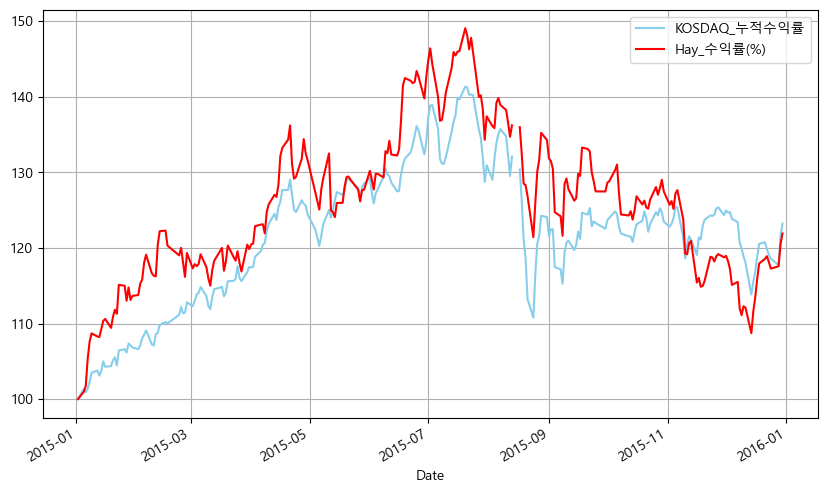

In [30]:
invest_list = 상위10종목_list
portfolio = pd.DataFrame()

# 한글 깨짐 방지
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'malgun Gothic'

for i in invest_list:
    portfolio[i] = fdr.DataReader(i, start, end)["Close"]

for i in invest_list:
    portfolio[i] = portfolio[i]/portfolio[i][0]


portfolio["Hay_수익률(%)"] = portfolio[invest_list[0]]

for i in invest_list:
    portfolio["Hay_수익률(%)"] = portfolio[i] + portfolio["Hay_수익률(%)"]
    
portfolio["Hay_수익률(%)"] = portfolio["Hay_수익률(%)"] - portfolio[invest_list[0]]
portfolio["Hay_수익률(%)"] = portfolio["Hay_수익률(%)"]/10
portfolio["Hay_수익률(%)"] = portfolio["Hay_수익률(%)"]*100

df_plot0 = pd.concat([portfolio, kospi_df, kosdaq_df],axis=1)
df_plot0.plot(y = ['KOSDAQ_누적수익률', "Hay_수익률(%)"], figsize = [10,6], grid = True, color=["skyblue", "red"])

,069080,078340,016170,192440,049960,084110,086900,018120,108320,036190,Hay_수익률(%)
Date,,,,,,,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000
2015-01-05,1.066202,1.007589,1.006536,1.039563,1.001905,1.001746,1.001858,0.962437,1.020040,0.989328,100.972030
2015-01-06,1.088850,1.050381,0.982571,1.084584,0.994286,0.983944,1.017903,0.938570,1.030060,1.001067,101.722158
2015-01-07,1.250871,1.084886,0.979303,1.186903,1.045714,0.960820,1.025927,0.933451,1.058116,1.007471,105.334621
2015-01-08,1.249129,1.097309,0.983660,1.317872,1.064762,0.960820,1.009262,0.955623,1.102204,1.020277,107.609175
...,...,...,...,...,...,...,...,...,...,...,...
2015-12-23,0.796167,0.869039,1.766885,0.800819,1.087619,1.522280,1.484882,1.172357,1.529058,0.783351,118.124567
2015-12-24,0.768293,0.862832,1.758170,0.811733,1.066667,1.502676,1.495681,1.184290,1.509018,0.766275,117.256341
2015-12-28,0.796167,0.857400,1.773420,0.817190,1.049524,1.536533,1.469142,1.185985,1.523046,0.749200,117.576068


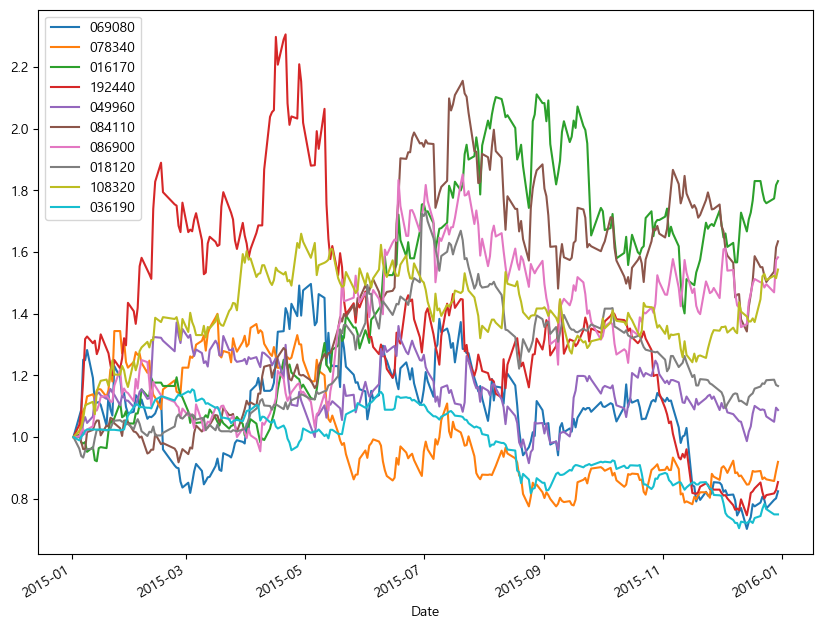

In [31]:
portfolio.drop('Hay_수익률(%)', axis=1).plot(figsize=(10,8))
portfolio

In [32]:
portfolio

,069080,078340,016170,192440,049960,084110,086900,018120,108320,036190,Hay_수익률(%)
Date,,,,,,,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000
2015-01-05,1.066202,1.007589,1.006536,1.039563,1.001905,1.001746,1.001858,0.962437,1.020040,0.989328,100.972030
2015-01-06,1.088850,1.050381,0.982571,1.084584,0.994286,0.983944,1.017903,0.938570,1.030060,1.001067,101.722158
2015-01-07,1.250871,1.084886,0.979303,1.186903,1.045714,0.960820,1.025927,0.933451,1.058116,1.007471,105.334621
2015-01-08,1.249129,1.097309,0.983660,1.317872,1.064762,0.960820,1.009262,0.955623,1.102204,1.020277,107.609175
...,...,...,...,...,...,...,...,...,...,...,...
2015-12-23,0.796167,0.869039,1.766885,0.800819,1.087619,1.522280,1.484882,1.172357,1.529058,0.783351,118.124567
2015-12-24,0.768293,0.862832,1.758170,0.811733,1.066667,1.502676,1.495681,1.184290,1.509018,0.766275,117.256341
2015-12-28,0.796167,0.857400,1.773420,0.817190,1.049524,1.536533,1.469142,1.185985,1.523046,0.749200,117.576068


In [33]:
portfolio

,069080,078340,016170,192440,049960,084110,086900,018120,108320,036190,Hay_수익률(%)
Date,,,,,,,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000
2015-01-05,1.066202,1.007589,1.006536,1.039563,1.001905,1.001746,1.001858,0.962437,1.020040,0.989328,100.972030
2015-01-06,1.088850,1.050381,0.982571,1.084584,0.994286,0.983944,1.017903,0.938570,1.030060,1.001067,101.722158
2015-01-07,1.250871,1.084886,0.979303,1.186903,1.045714,0.960820,1.025927,0.933451,1.058116,1.007471,105.334621
2015-01-08,1.249129,1.097309,0.983660,1.317872,1.064762,0.960820,1.009262,0.955623,1.102204,1.020277,107.609175
...,...,...,...,...,...,...,...,...,...,...,...
2015-12-23,0.796167,0.869039,1.766885,0.800819,1.087619,1.522280,1.484882,1.172357,1.529058,0.783351,118.124567
2015-12-24,0.768293,0.862832,1.758170,0.811733,1.066667,1.502676,1.495681,1.184290,1.509018,0.766275,117.256341
2015-12-28,0.796167,0.857400,1.773420,0.817190,1.049524,1.536533,1.469142,1.185985,1.523046,0.749200,117.576068


# 포트폴리오의 수익률, 표준편차

---

# Portfolio

<AxesSubplot: ylabel='Frequency'>

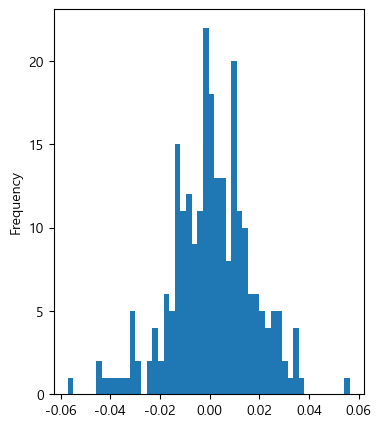

In [34]:
# 일별 수익률
portfolio['일일수익률'] = portfolio['Hay_수익률(%)'].pct_change()

# 일별 수익률 평균을 연율화
portfolio_annual_return = portfolio['일일수익률'].mean() * 252



# 일별 수익률 표준편차
portfolio_std = portfolio['일일수익률'].std()

# 연율화된 변동성
portfolio_annual_volatility = portfolio['일일수익률'].std() * 252 ** 0.5


# 일별 수익률 히스토그램
portfolio['일일수익률'].plot(kind='hist', bins=50, figsize=(4,5))

In [35]:
portfolio

,069080,078340,016170,192440,049960,084110,086900,018120,108320,036190,Hay_수익률(%),일일수익률
Date,,,,,,,,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,NaN
2015-01-05,1.066202,1.007589,1.006536,1.039563,1.001905,1.001746,1.001858,0.962437,1.020040,0.989328,100.972030,0.009720
2015-01-06,1.088850,1.050381,0.982571,1.084584,0.994286,0.983944,1.017903,0.938570,1.030060,1.001067,101.722158,0.007429
2015-01-07,1.250871,1.084886,0.979303,1.186903,1.045714,0.960820,1.025927,0.933451,1.058116,1.007471,105.334621,0.035513
2015-01-08,1.249129,1.097309,0.983660,1.317872,1.064762,0.960820,1.009262,0.955623,1.102204,1.020277,107.609175,0.021594
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-23,0.796167,0.869039,1.766885,0.800819,1.087619,1.522280,1.484882,1.172357,1.529058,0.783351,118.124567,-0.006580
2015-12-24,0.768293,0.862832,1.758170,0.811733,1.066667,1.502676,1.495681,1.184290,1.509018,0.766275,117.256341,-0.007350
2015-12-28,0.796167,0.857400,1.773420,0.817190,1.049524,1.536533,1.469142,1.185985,1.523046,0.749200,117.576068,0.002727


In [36]:
# 포트폴리오 수익률

portfolio_return = ((portfolio['Hay_수익률(%)'][-1])-(portfolio['Hay_수익률(%)'][0]))/portfolio['Hay_수익률(%)'][0] * 100
portfolio_return

21.90322727626861

In [37]:
# 포트폴리오 샤프 지수
pf_sharpe_ratio = (portfolio_annual_return-0.02)/ portfolio_annual_volatility
print(pf_sharpe_ratio)

0.8243180490104531


# KOSPI

In [38]:
kospi_df['Normed Return'] = kospi_df['Close'] /kospi_df.iloc[0]['Close']
kospi_df['KSTotal'] = kospi_df['Normed Return']*100
kospi_df

,Open,High,Low,Close,Adj Close,Volume,KOSPI_누적수익률,Normed Return,KSTotal
Date,,,,,,,,,
2015-01-02,1914.239990,1929.150024,1909.670044,1926.439941,1926.439941,258800.0,100.000000,1.000000,100.000000
2015-01-05,1921.959961,1921.959961,1903.369995,1915.750000,1915.750000,313400.0,99.445093,0.994451,99.445093
2015-01-06,1895.479980,1900.020020,1877.380005,1882.449951,1882.449951,303700.0,97.716514,0.977165,97.716514
2015-01-07,1878.900024,1887.599976,1876.270020,1883.829956,1883.829956,280500.0,97.788149,0.977881,97.788149
2015-01-08,1895.849976,1907.229980,1891.770020,1904.650024,1904.650024,262200.0,98.868902,0.988689,98.868902
...,...,...,...,...,...,...,...,...,...
2015-12-23,1994.199951,2007.420044,1989.300049,1999.219971,1999.219971,502400.0,103.777955,1.037780,103.777955
2015-12-24,2009.339966,2009.989990,1990.650024,1990.650024,1990.650024,504600.0,103.333096,1.033331,103.333096
2015-12-28,1990.589966,1991.189941,1964.060059,1964.060059,1964.060059,396600.0,101.952831,1.019528,101.952831


<AxesSubplot: ylabel='Frequency'>

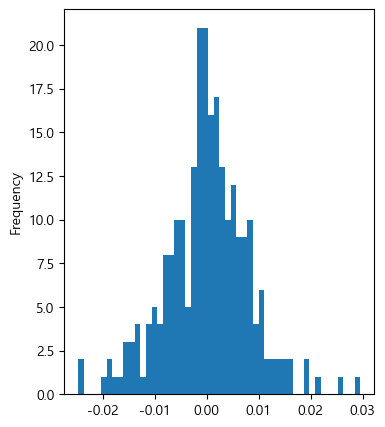

In [39]:
# 일별 수익률
kospi_df['일일수익률'] = kospi_df['KSTotal'].pct_change()

# 일별 수익률 평균을 연율화
kospi_annual_return = kospi_df['일일수익률'].mean() * 252



# 일별 수익률 표준편차
kospi_standard = kospi_df['일일수익률'].std()

# 연율화된 변동성
kospi_annual_volatility = kospi_df['일일수익률'].std() * 252 ** 0.5


# 일별 수익률 히스토그램
kospi_df['일일수익률'].plot(kind='hist', bins=50, figsize=(4,5))

In [40]:
# KOSPI 수익률

kospi_return = ((kospi_df['KSTotal'][-1])-(kospi_df['KSTotal'][0]))/kospi_df['KSTotal'][0] * 100
kospi_return

1.8100807223659956

In [41]:
# KOSPI 샤프 지수
ks_sharpe_ratio = (kospi_annual_return-0.02)/ kospi_annual_volatility
print(ks_sharpe_ratio)

0.049165478874997136


In [53]:
kospi_annual_volatility

0.12678802097289738

In [42]:
# Portfolio - KOSPI 와 비교한 샤프지수
sharpe_comparison_ks = (portfolio_annual_return - kospi_annual_return) / portfolio_annual_volatility
print(sharpe_comparison_ks)

0.800596481542905


In [50]:
portfolio_annual_volatility

0.2627816975110704

# KOSDAQ

In [43]:
kosdaq_df['Normed Return'] = kosdaq_df['Close'] /kosdaq_df.iloc[0]['Close']
kosdaq_df['KQTotal'] = kosdaq_df['Normed Return']*100

<AxesSubplot: ylabel='Frequency'>

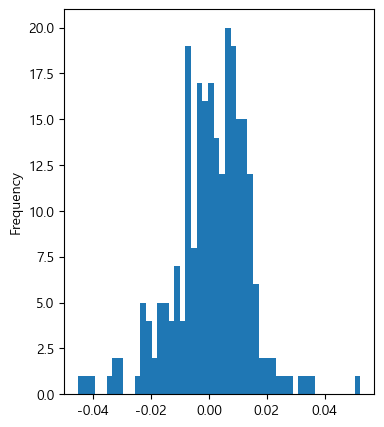

In [44]:
# 일별 수익률
kosdaq_df['일일수익률'] = kosdaq_df['KQTotal'].pct_change()

# 일별 수익률 평균을 연율화
kosdaq_annual_return = kosdaq_df['일일수익률'].mean() * 252



# 일별 수익률 표준편차
kosdaq_standard = kosdaq_df['일일수익률'].std()

# 연율화된 변동성
kosdaq_annual_volatility = kosdaq_df['일일수익률'].std() * 252 ** 0.5


# 일별 수익률 히스토그램
kosdaq_df['일일수익률'].plot(kind='hist', bins=50, figsize=(4,5))

In [45]:
# KOSDAQ 수익률

kosdaq_return = ((kosdaq_df['KQTotal'][-1])-(kosdaq_df['KQTotal'][0]))/kosdaq_df['KQTotal'][0] * 100
kosdaq_return

23.227927084605398

In [46]:
# KOSDAQ 샤프 지수
kq_sharpe_ratio = (kosdaq_annual_return-0.02)/ portfolio_annual_volatility
print(kq_sharpe_ratio)

1.6890268228441099


In [52]:
portfolio_annual_volatility

0.2627816975110704

In [55]:
# Portfolio - KOSDAQ 와 비교한 샤프지수
sharpe_comparison_kq = (portfolio_annual_return) / portfolio_annual_volatility
print(sharpe_comparison_kq)

0.9004268503060892


In [54]:
portfolio_annual_return - portfolio_annual_volatility*0.9

0.00011216844801723025

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2015-01-02  2015-01-02
End Period                 2015-12-30  2015-12-30
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          21.9%       1.81%
CAGR﹪                     22.1%       1.83%

Sharpe                     0.9         0.21
Prob. Sharpe Ratio         81.14%      58.12%
Smart Sharpe               0.81        0.19
Sortino                    1.29        0.29
Smart Sortino              1.16        0.27
Sortino/√2                 0.91        0.21
Smart Sortino/√2           0.82        0.19
Omega                      1.16        1.16

Max Drawdown               -27.06%     -15.81%
Longest DD Days            162         250
Volatility (ann.)          26.23%      12.68%
R^2                        0.23        0.23
Information Ratio          0.06        0.06
Calmar                     0.82        0

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2015-07-21,2015-12-14,2015-12-30,162,-27.062122,-25.117866
2,2015-04-22,2015-05-14,2015-06-17,56,-8.912030,-8.416829
3,2015-07-03,2015-07-07,2015-07-20,17,-6.541872,-6.461841
4,2015-02-17,2015-03-11,2015-04-03,45,-5.956754,-5.154944
5,2015-06-26,2015-06-29,2015-07-01,5,-2.535421,-0.538156


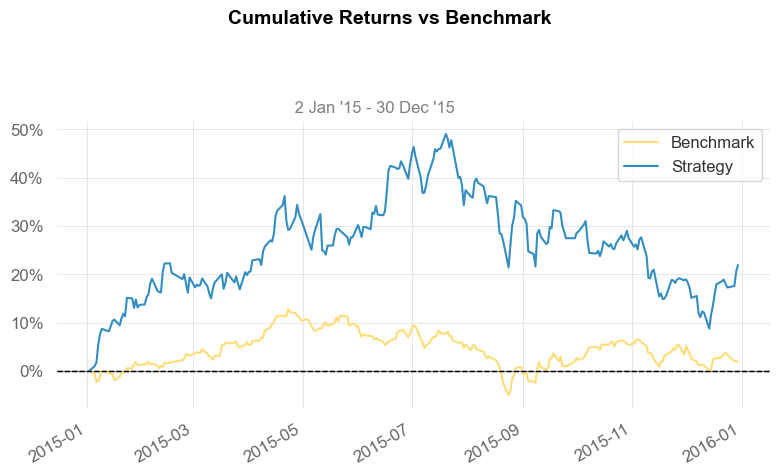

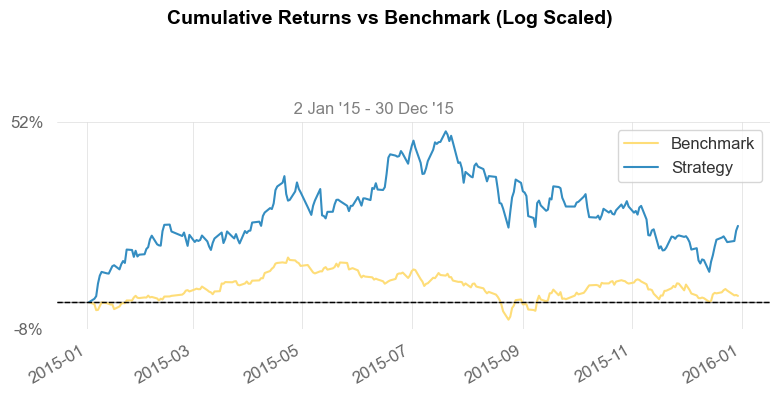

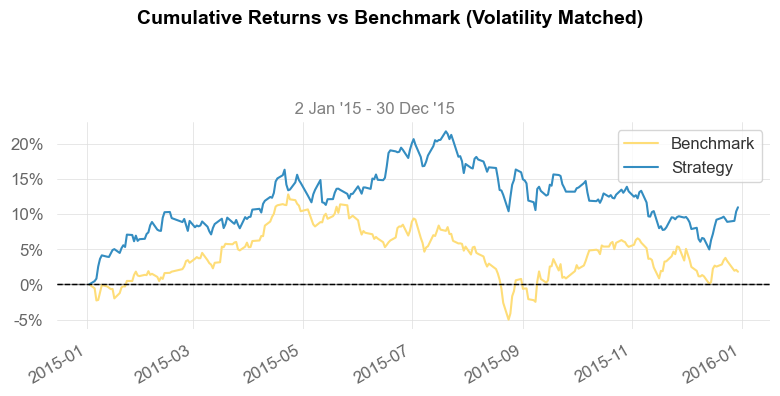

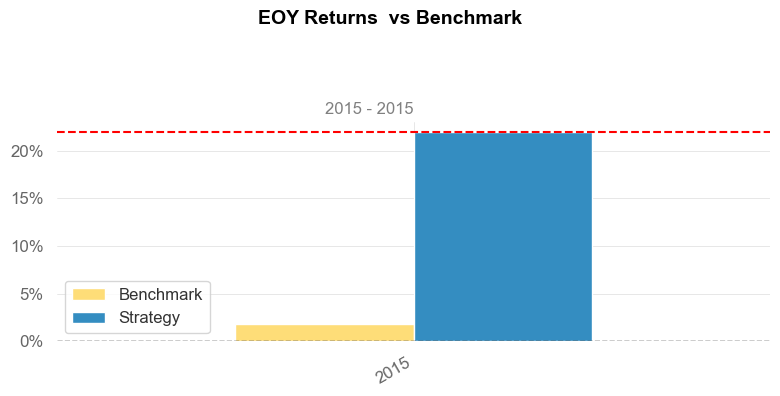

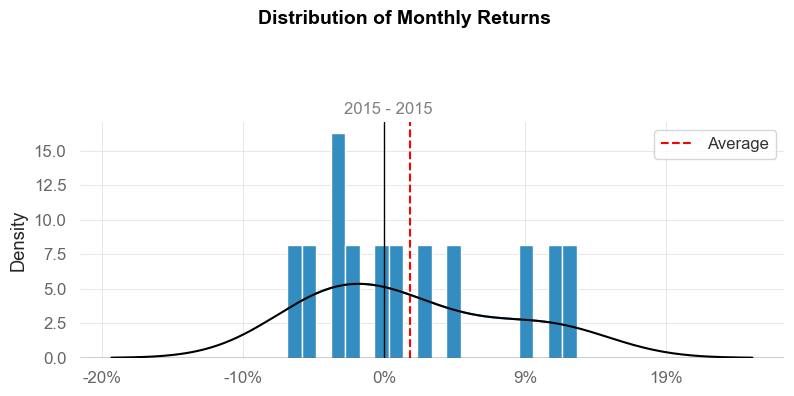

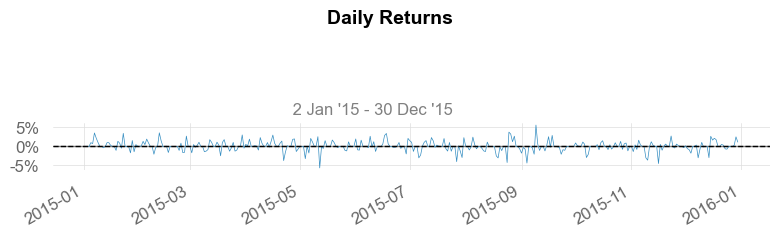

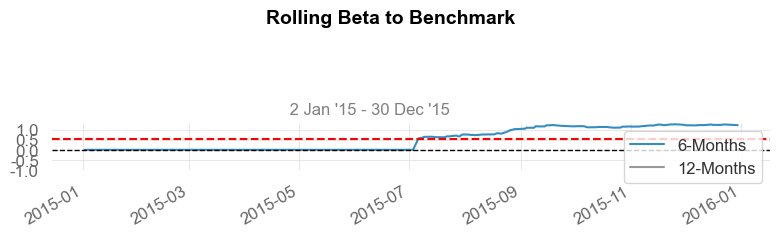

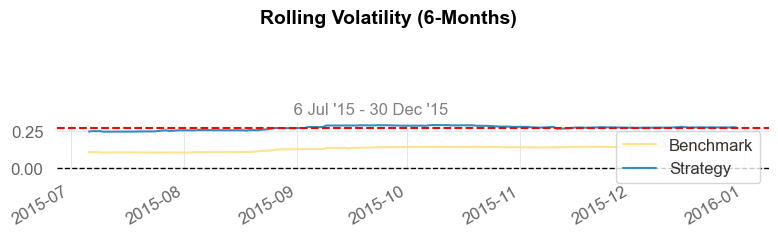

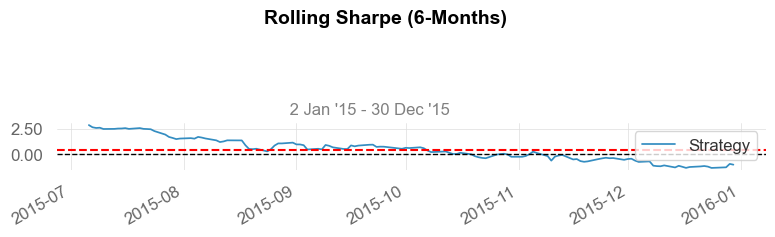

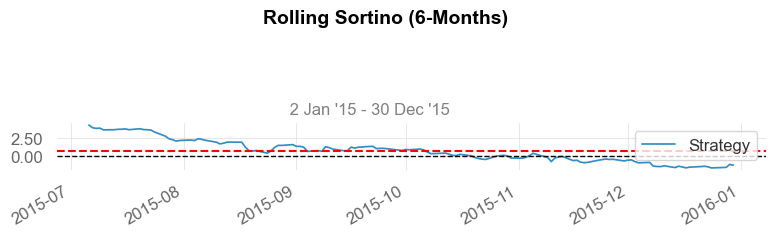

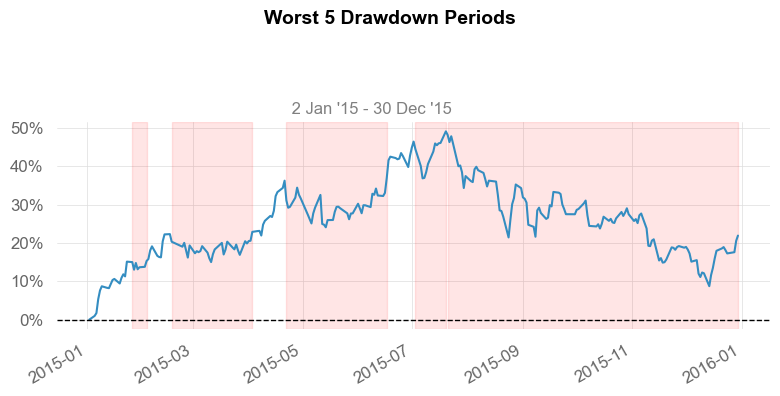

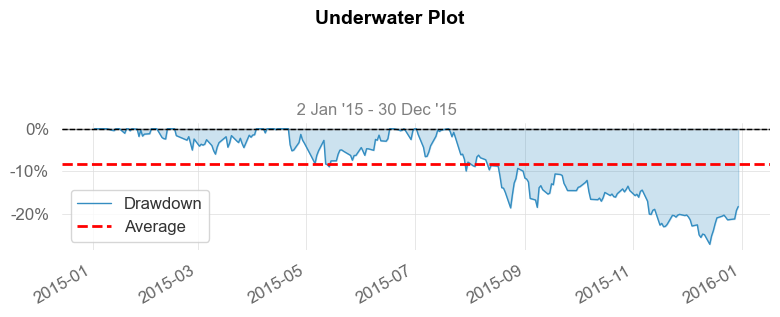

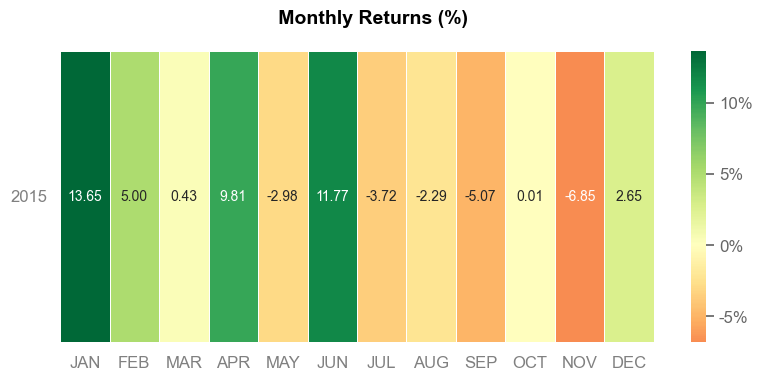

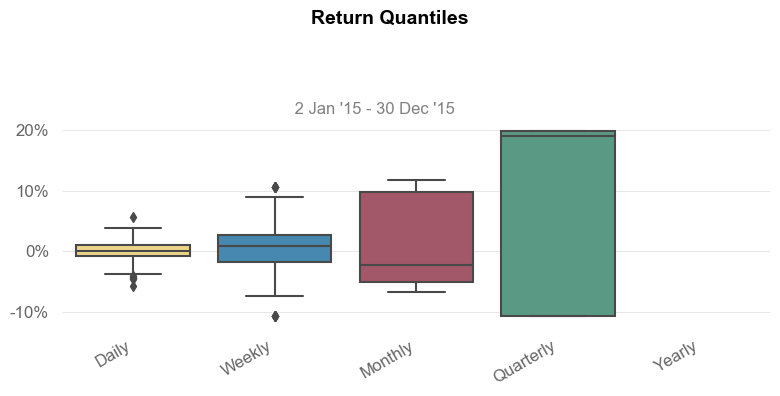

In [51]:
import quantstats as qs
qs.reports.full(portfolio['일일수익률'], kospi_df['일일수익률'])